<a href="https://colab.research.google.com/github/kattanavya18/Cats-vs-Dogs-Classification/blob/main/cat_vs_dogs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [8]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.04G/1.06G [00:04<00:00, 276MB/s]
100% 1.06G/1.06G [00:04<00:00, 260MB/s]


In [9]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [24]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [25]:
#generators
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)
validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [26]:
#normalize
def process(image,label):
  image=tf.cast(image/255. , tf.float32)
  return image,label
train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [27]:
#create cnn model

model= Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(1,activation='sigmoid'))





In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [29]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [30]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 72s 108ms/step - loss: 1.3037 - accuracy: 0.5965 - val_loss: 0.6270 - val_accuracy: 0.6848
Epoch 2/10
625/625 [==============================] - 80s 128ms/step - loss: 0.5573 - accuracy: 0.7175 - val_loss: 0.5140 - val_accuracy: 0.7448
Epoch 3/10
625/625 [==============================] - 68s 109ms/step - loss: 0.4667 - accuracy: 0.7803 - val_loss: 0.4919 - val_accuracy: 0.7704
Epoch 4/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4100 - accuracy: 0.8146 - val_loss: 0.6477 - val_accuracy: 0.6980
Epoch 5/10
625/625 [==============================] - 66s 105ms/step - loss: 0.3513 - accuracy: 0.8500 - val_loss: 0.5331 - val_accuracy: 0.7400
Epoch 6/10
625/625 [==============================] - 66s 104ms/step - loss: 0.2696 - accuracy: 0.8863 - val_loss: 0.4310 - val_accuracy: 0.8226
Epoch 7/10
625/625 [==============================] - 68s 108ms/step - loss: 0.1797 - accuracy: 0.9283 - val_loss: 0.7664 - val_ac

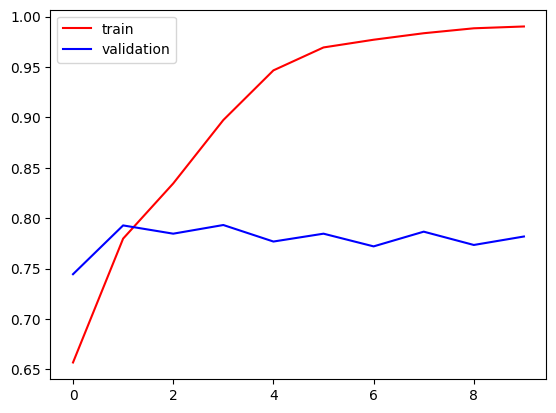

In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


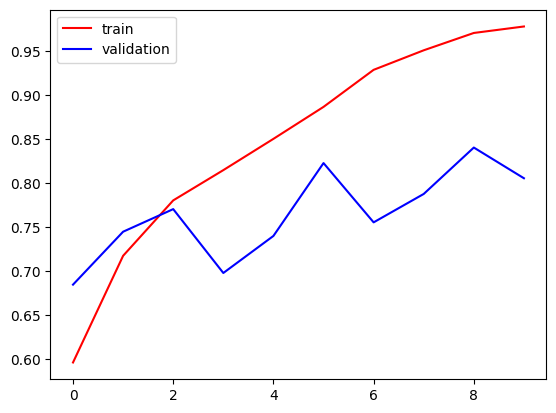

In [31]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

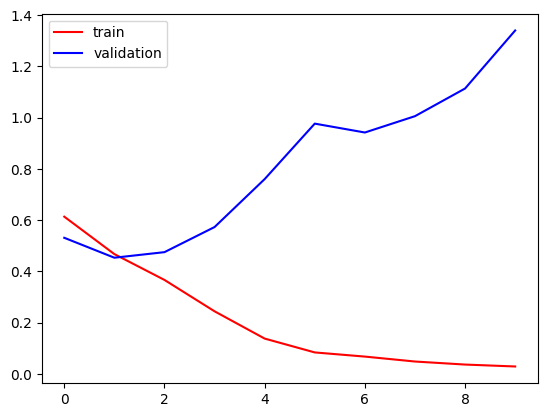

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

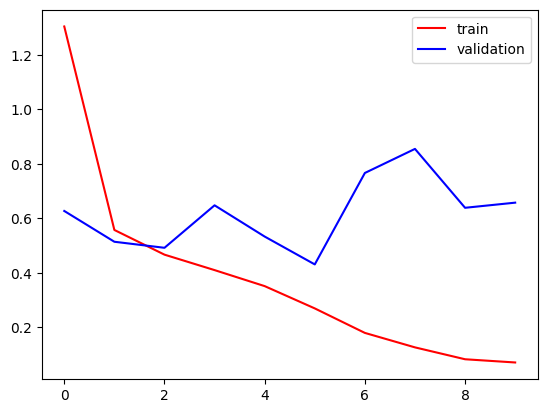

In [32]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
#ways to reduce overfitting
# add more data
# data augmentation
# l1/l2 regulation
# dropout
# batch norm
# reduce complexity

In [79]:
import cv2

In [80]:
test_img=cv2.imread('/content/dog.jpeg')

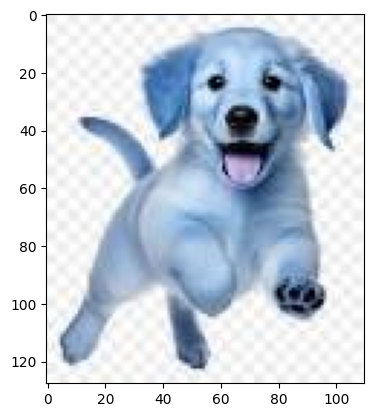

In [81]:
plt.imshow(test_img)

In [82]:
test_img.shape

(128, 110, 3)

In [83]:
test_img=cv2.resize(test_img,(256,256))

In [84]:
test_input=test_img.reshape(1,256,256,3)

In [85]:
model.predict(test_input)

1/1 [==============================] - 0s 29ms/step


array([[1.]], dtype=float32)

In [92]:
test_img2=cv2.imread('/content/catt.jpg')

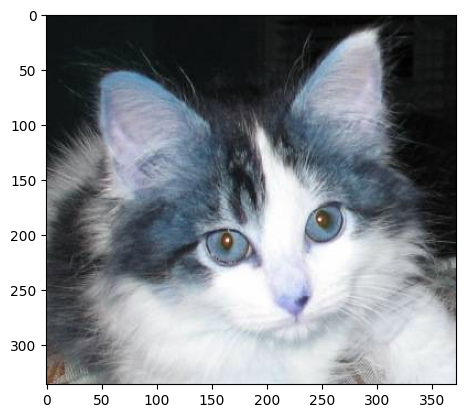

In [93]:
plt.imshow(test_img2)

In [94]:
test_img2.shape

(336, 373, 3)

In [95]:
test_img2=cv2.resize(test_img2,(256,256))

In [96]:
test_input2=test_img2.reshape(1,256,256,3)

In [97]:
model.predict(test_input2)

1/1 [==============================] - 0s 19ms/step


array([[0.]], dtype=float32)